    Vehicle Id  User Id   Timestamp                Location  Speed  Battery  \
0       831987      152  1605281901  (-39.03464,-134.28745)     78       43   
1       220901      664  1616234623    (38.01221,-68.11901)     58       29   
2       702843      743  1610452521   (-57.15985,-82.85457)     10       65   
3       732018      280  1604478900   (-35.60355,-71.32914)     82        7   
4       605285      573  1619187723    (-29.62463,82.04898)     95       51   
5       791628      463  1630261304    (80.59053,111.39915)     55       91   
6       249465      947  1610428327     (70.34632,47.25351)      5       68   
7       191491      676  1613939156    (22.77688,-15.53332)     14       15   
8       493601      956  1614630451     (0.67112,-51.02665)     85       41   
9       599643      464  1624614612    (69.31854,-56.17661)     87       80   
10      858748      967  1620879912    (-19.07104,-7.96155)     61       83   
11      324609      876  1610191022    (-63.04993,42

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


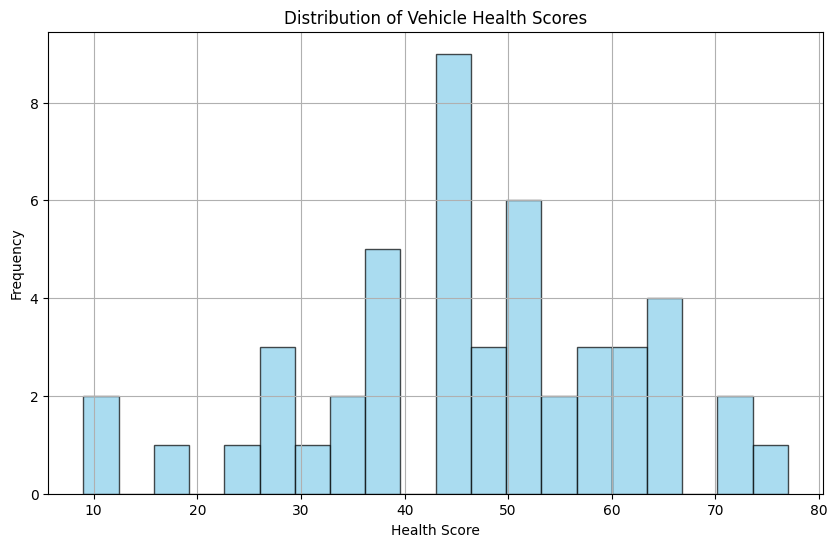

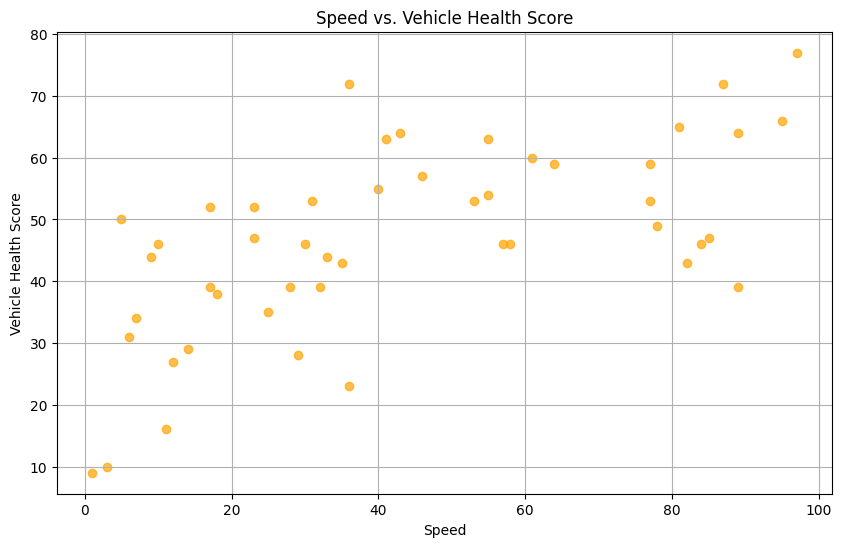

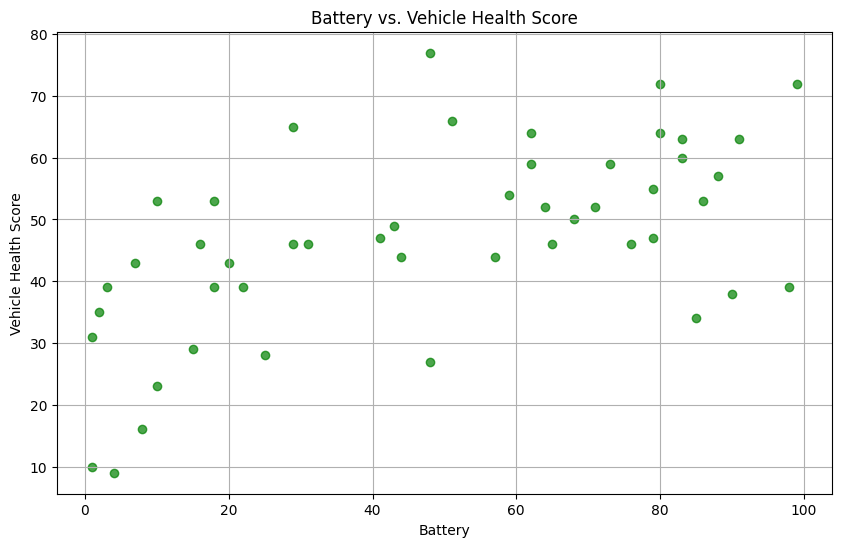

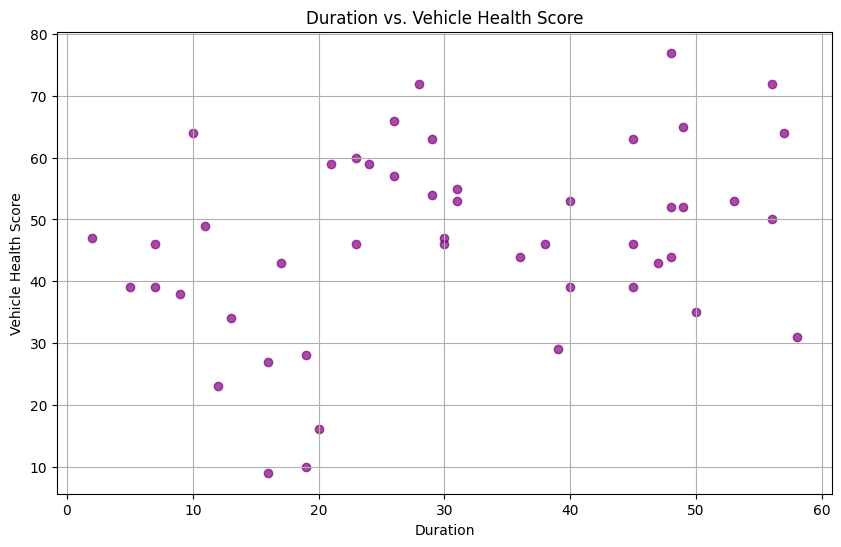

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Read the CSV file into a DataFrame
df = pd.read_csv("tcu_data.csv")

# Define a function to calculate vehicle health score
def calculate_health_score(speed, battery, duration):
    # Define weights for each feature
    speed_weight = 0.4
    battery_weight = 0.3
    duration_weight = 0.3

    # Normalize features
    speed_norm = int(speed) / 100  # Assuming speed ranges from 0 to 100
    battery_norm = int(battery) / 100  # Assuming battery percentage ranges from 0 to 100
    duration_norm = min(duration / 60, 1)  # Assuming duration is in minutes and normalize to range from 0 to 1

    # Calculate weighted sum
    weighted_sum = (speed_weight * speed_norm) + (battery_weight * battery_norm) + (duration_weight * duration_norm)

    # Map weighted sum to a scale of 1 to 100
    health_score = int(weighted_sum * 100)

    return health_score

# Apply the function to calculate the synthetic vehicle health score
df['Vehicle Health Score'] = df.apply(lambda row: calculate_health_score(row['Speed'], row['Battery'], row['Duration']), axis=1)

# Display the updated DataFrame
print(df)

# Define features (X_train) and target variable (y_train)
X_train = df[['Speed', 'Battery', 'Duration']].values
y_train = df['Vehicle Health Score'].values

# Additional preprocessing: Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Save the model
model.save("vehicle_health_lstm_model.h5")



# Plot histogram of vehicle health scores
plt.figure(figsize=(10, 6))
plt.hist(df['Vehicle Health Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Vehicle Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot scatter plot of speed vs. vehicle health score
plt.figure(figsize=(10, 6))
plt.scatter(df['Speed'], df['Vehicle Health Score'], color='orange', alpha=0.7)
plt.title('Speed vs. Vehicle Health Score')
plt.xlabel('Speed')
plt.ylabel('Vehicle Health Score')
plt.grid(True)
plt.show()

# Plot scatter plot of battery vs. vehicle health score
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery'], df['Vehicle Health Score'], color='green', alpha=0.7)
plt.title('Battery vs. Vehicle Health Score')
plt.xlabel('Battery')
plt.ylabel('Vehicle Health Score')
plt.grid(True)
plt.show()

# Plot scatter plot of duration vs. vehicle health score
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Vehicle Health Score'], color='purple', alpha=0.7)
plt.title('Duration vs. Vehicle Health Score')
plt.xlabel('Duration')
plt.ylabel('Vehicle Health Score')
plt.grid(True)
plt.show()



# New section